<a href="https://colab.research.google.com/github/DzakyFawwaz/gejalaku-app/blob/main/gejalaku-ml/modeling/NLP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library & Load Data

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [28]:
# import dataset penyakit dan gejalanya
url1='https://drive.google.com/file/d/1rn3qjDsP_3SBsM_nJQoK272_sPH42uWt/view?usp=sharing'
url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
df_disease = pd.read_csv(url1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Infeksi jamur,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Infeksi jamur,gatal,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Infeksi jamur,gatal,ruam kulit,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

pada tahap ini, akan dilakukan :
- mengubah format data gejala yaitu dengan mengganti spasi menjadi _, seperti "ruam kulit" menjadi "ruam_kulit"
- fitur yang NaN (tidak ada gejala) diganti menjadi '' (string kosong)
- seluruh gejala pada tiap baris data dijadikan satu pada satu fitur
- mengimplementasi TF-IDF Vectorizer pada fitur symptom

In [29]:
# mengubah format data gejala

# inisialisasi fitur gejala
symptom_cols = [f'Symptom_{i}' for i in range(1, 18)]  # ['Symptom_1', ..., 'Symptom_17']
# mengganti NaN menjadi string kosong
df_disease[symptom_cols] = df_disease[symptom_cols].fillna('')
# mengubah spasi menjadi _
df_disease[symptom_cols] = df_disease[symptom_cols].applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)

df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,
1,Infeksi jamur,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
2,Infeksi jamur,gatal,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
3,Infeksi jamur,gatal,ruam_kulit,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
4,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,,,,,,,,,,,,,,


In [30]:
# gabungkan semua symptom pada satu fitur
df_disease['combined_symptoms'] = df_disease[symptom_cols].astype(str).agg(' '.join, axis=1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,combined_symptoms
0,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,gatal ruam_kulit erupsi_kulit_nodular bercak_k...
1,Infeksi jamur,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,ruam_kulit erupsi_kulit_nodular bercak_kulit_t...
2,Infeksi jamur,gatal,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,gatal erupsi_kulit_nodular bercak_kulit_tidak_...
3,Infeksi jamur,gatal,ruam_kulit,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,gatal ruam_kulit bercak_kulit_tidak_merata_war...
4,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,,,,,,,,,,,,,,,gatal ruam_kulit erupsi_kulit_nodular ...


In [31]:
# implementasi TF-IDF Vectorizer

# inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(token_pattern=r'[^ ]+') # hanya mengambil token yang dipisahkan spasi

# melakukan perhitungan idf pada data gejala
tfidf.fit(df_disease['combined_symptoms'])

# mapping array dari fitur index integer ke fitur nama
tfidf.get_feature_names_out()

array(['asam_lambung', 'batuk', 'bau_tidak_sedap_pada_urin',
       'bercak_di_tenggorokan', 'bercak_kulit_tidak_merata_warna',
       'bercak_saat_buang_air_kecil', 'berkeringat',
       'bersin_terus-menerus', 'bibir_kering_dan_kesemutan',
       'bicara_pelo', 'bintik_merah_di_tubuh', 'buang_angin',
       'cekungan_kecil_di_kuku', 'dahak', 'dahak_berlendir',
       'dahak_berwarna_karat', 'darah_di_dahak', 'dehidrasi',
       'demam_ringan', 'demam_tinggi', 'depresi', 'detak_jantung_cepat',
       'diare', 'erupsi_kulit_nodular', 'gagal_hati_akut',
       'gangguan_kesadaran', 'gangguan_pencernaan',
       'gangguan_penglihatan', 'gatal', 'gatal_dari_dalam_tubuh',
       'gelisah', 'gerakan_berputar', 'gula_darah_tidak_teratur',
       'hidung_meler', 'hidung_tersumbat', 'iritasi_di_anus',
       'iritasi_tenggorokan', 'jantung_berdebar', 'jerawat_berisi_nanah',
       'kaki_bengkak', 'kecemasan', 'kedinginan',
       'kehilangan_keseimbangan', 'kehilangan_nafsu_makan',
       'keh

In [32]:
# melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(df_disease['combined_symptoms'])

# melihat ukuran matrix tfidf
tfidf_matrix.shape

(304, 131)

In [34]:
# mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan gejala
# Baris diisi dengan nama penyakit

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=df_disease.Disease
).sample(22, axis=1, replace=True).sample(10, axis=0)

,penurunan_berat_badan,urin_kuning,sakit_kepala,iritasi_di_anus,rasa_terus_ingin_buang_air_kecil,pembuluh_darah_menonjol_di_betis,kuku_meradang,kontak_di_luar_pernikahan,detak_jantung_cepat,muntah,...,nyeri_saat_buang_air_kecil,iritasi_tenggorokan,sakit_leher,leher_kaku,penglihatan_kabur_dan_terganggu,kehilangan_keseimbangan,kekakuan_gerak,nyeri_sendi,nyeri_di_belakang_mata,pembengkakan_kelenjar_getah_bening
Disease,,,,,,,,,,,,,,,,,,,,,
GERD (refluks asam lambung),0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.233380,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Wasir tipe dimorfik,0.000000,0.0,0.000000,0.461968,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Hepatitis alkoholik,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.216387,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Tifus,0.000000,0.0,0.239686,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Cacar air,0.000000,0.0,0.250599,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.357151
Penyakit kuning,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.298768,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Migrain,0.000000,0.0,0.235164,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.392679,0.338846,0.0,0.0,0.0,0.0,0.000000
Migrain,0.000000,0.0,0.220203,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.367697,0.317289,0.0,0.0,0.0,0.0,0.000000
Cacar air,0.000000,0.0,0.268294,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Label encode
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

num_classes = len(le.classes_)

## Modeling

In [45]:
# Model
model = Sequential()
model.add(Dense(128, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile dengan sparse categorical crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training model dan simpan history
history = model.fit(
    X_train.toarray(), y_train_enc,
    epochs=10,
    validation_data=(X_test.toarray(), y_test_enc)
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0082 - loss: 3.7095 - val_accuracy: 0.1148 - val_loss: 3.6371
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1623 - loss: 3.6193 - val_accuracy: 0.4098 - val_loss: 3.5549
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4051 - loss: 3.5378 - val_accuracy: 0.7049 - val_loss: 3.4686
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6828 - loss: 3.4601 - val_accuracy: 0.8525 - val_loss: 3.3729
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8698 - loss: 3.3560 - val_accuracy: 0.8852 - val_loss: 3.2645
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9072 - loss: 3.2400 - val_accuracy: 0.9016 - val_loss: 3.1427
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9372 - loss: 3.1171 - val_accuracy: 0.9180 - val_loss: 3.0095
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9515 - loss: 2.9853 - val_accuracy: 0.9180 - val_loss: 2.8602
Epoch

## Model Evaluation

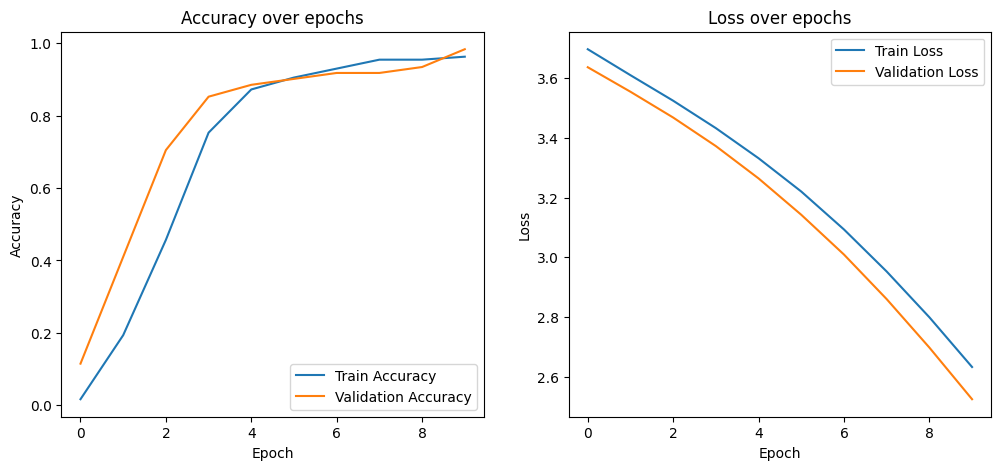

Test Accuracy: 0.9836
Test Loss: 2.5247


In [48]:
# Plot Akurasi dan Loss selama training
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluasi akurasi di data test
loss, accuracy = model.evaluate(X_test.toarray(), y_test_enc, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')